<a href="https://colab.research.google.com/github/mbaliu-treino/Desenvolve/blob/main/LEARN_C_DS_DeepLearning_Rede_Neural_com_Numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color=orange><b>Regressão: implemente uma rede neural com numpy</b></font>

<font color=gray size=2><a href=https://colab.research.google.com/drive/1j-c9deeieWMZnCeR8h5QoenlCnMbD1ZM>Arquivo Colab</a></font>

<ul><font size=2 color=gray>FICHA TÉCNICA
<li><a href=https://cursos.alura.com.br/course/rede-neural-numpy><font size=2 color=gray>Regressão: implemente uma rede neural com numpy</a>
<li>Carga Horária: 7 h
<li>Instrutora: Allan Spadini
<li>Data de Início: 09-2022
</ul>

<hr color=gray><br>
<h3><b>Conteúdo / Aprendizagem:</b></h3>

- 

# <font color=orange>RESUMO</font>

<a href=https://docs.google.com/spreadsheets/d/1tTygYlq9r7nkUsw9a25N5_z57-de_59tSBCIVPw6KUw><font size=2 color=gray>ROTEIROS Data Science</font></a>

* <font color=orange><b>

* 

# <font color=orange>**CURSO**</font>

**Projeto**: neste curso é abordado um caso hipotético de uma análise das análises de uma empresa de mobilidade urbana com bicicletas alugadas. 


<font color=orange><b></b></font>


> A base de dados que estamos usando foi baseada na Bike Sharing Dataset, obtida a partir de sistemas de compartilhamento de bicicletas que são formas diferentes de aluguel de bicicletas, em que o processo de associação, locação e devolução é automático. Assim, um usuário pode alugar uma bicicleta a partir de uma determinada posição e retornar em outra posição. Os dados provenientes desses sistemas são muito interessantes para pesquisas em ciência de dados e aprendizagem de máquina (o famoso machine learning). Além das informações usadas no curso, são registradas informações relacionada à posição de partida e chegada de cada usuário. O que não ocorre em outras formas de transporte como ônibus e metrô. Isso faz com que o sistema de compartilhamento de bicicletas seja uma forma eficiente de estudar a mobilidade na cidade.

> No artigo de Fanaee-T. e Gama (2013), essa base de dados foi usada para estudar um algoritmo de rotulagem de eventos. Por exemplo, se ocorreu um empréstimo de bicicleta ou não. Os resultados mostraram que o algoritmo proposto pode ser uma alternativa viável na falta de humanos treinados no assunto.

Referência bibliográfica

Fanaee-T., Hadi, and Gama, João. 'Event labeling combining ensemble detectors and background knowledge', Progress in Artificial Intelligence (2013): pp. 1-15, Springer Berlin Heidelberg. doi:10.1007/s13748-013-0040-3

<a href=https://github.com/alura-cursos/redes-neurais/archive/allanspadini-aula-5.zip><font size=2; color=gray>Material de referencial do curso</a></font>

<a href="https://colab.research.google.com/drive/1mOy30tlkdhbm4JLMPqIunzKbvbZMa1iZ?authuser=1#scrollTo=Wa1fIf_Ny5Vv&uniqifier=1"><font size=2; color=gray>Material de referencial do curso</a></font>



## <font color=orange><b>Carga de dados</b></font>

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [5]:
# Download dos dados
data_uri = 'https://github.com/alura-cursos/redes-neurais/archive/allanspadini-aula-1.zip'

!wget $data_uri
!unzip /content/allanspadini-aula-1.zip

--2022-09-05 20:50:04--  https://github.com/alura-cursos/redes-neurais/archive/allanspadini-aula-1.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/alura-cursos/redes-neurais/zip/refs/heads/allanspadini-aula-1 [following]
--2022-09-05 20:50:04--  https://codeload.github.com/alura-cursos/redes-neurais/zip/refs/heads/allanspadini-aula-1
Resolving codeload.github.com (codeload.github.com)... 140.82.112.9
Connecting to codeload.github.com (codeload.github.com)|140.82.112.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘allanspadini-aula-1.zip’

allanspadini-aula-1     [ <=>                ]   6.04K  --.-KB/s    in 0.002s  

2022-09-05 20:50:04 (3.64 MB/s) - ‘allanspadini-aula-1.zip’ saved [6186]

Archive:  /content/allanspadini-aula-1.zip
194fc7bbc9d83beae2c657b

In [39]:
# Leitura no Pandas
dados = pd.read_csv('/content/redes-neurais-allanspadini-aula-1/Bicicletas.csv')
dados.sample(5)

,clima,temperatura,bicicletas_alugadas
423,1,0.353525,4363
294,1,0.425492,4308
267,2,0.572637,5010
517,2,0.607962,4127
222,1,0.651521,4792


## <font color=orange><b>Explorando a base de dados</b></font>

In [53]:
# Tamanho da base
dados.shape

(731, 3)

In [54]:
# Colunas
list(dados.columns)

['clima', 'temperatura', 'bicicletas_alugadas']

O objetivo é entender a quantidade de bicicletas alugadas, por tanto essa variável será o nosso ALVO. As variáveis de clima e temperatura são atributos do dia, junto da métrica de quantidade de bicicletas alugadas.

In [55]:
# Configuração da imagem
mpl.rcParams['figure.figsize'] = (10,6)
mpl.rcParams['font.size'] = 12

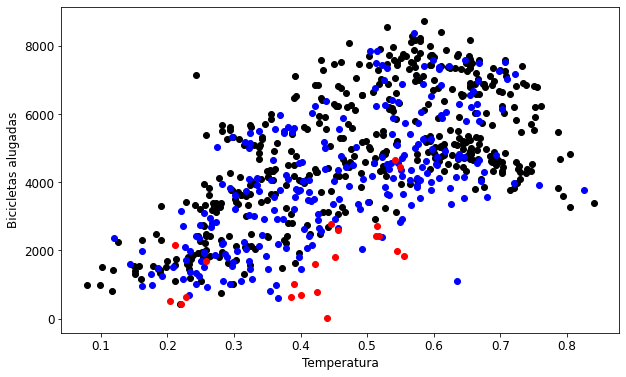

In [56]:
# Scatter com Matplotlib
sel = dados['clima']==1
plt.scatter(dados[sel]['temperatura'], dados[sel]['bicicletas_alugadas'], c='k')

sel = dados['clima']==2
plt.scatter(dados[sel]['temperatura'], dados[sel]['bicicletas_alugadas'], c='b')

sel = dados['clima']==3
plt.scatter(dados[sel]['temperatura'], dados[sel]['bicicletas_alugadas'], c='r')

plt.xlabel('Temperatura')
plt.ylabel('Bicicletas alugadas')
plt.show()

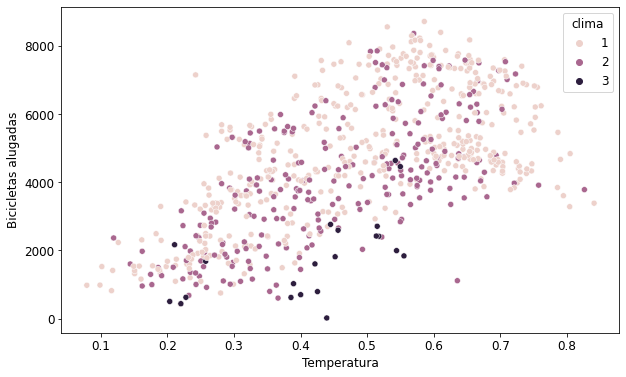

In [57]:
# Scatter com Seaborn
sns.scatterplot(data=dados, x='temperatura', y='bicicletas_alugadas', hue='clima')
plt.xlabel('Temperatura')
plt.ylabel('Bicicletas alugadas')
plt.show()

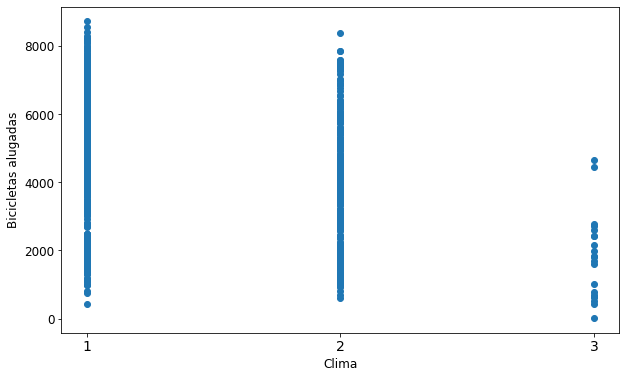

In [58]:
# CATEGÓRICA x NUMÉRICA - scatter
plt.scatter(dados['clima'], dados['bicicletas_alugadas'])
plt.xlabel('Clima')
plt.ylabel('Bicicletas alugadas')

indice = [1,2,3]
plt.xticks(indice, fontsize=14)
plt.show()

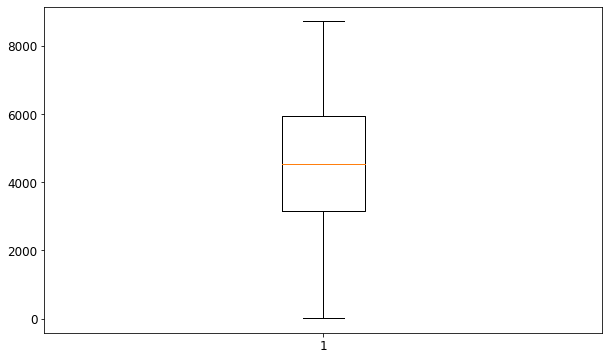

In [59]:
# CATEGÓRICA x NUMÉRICA - boxplot
plt.boxplot(dados['bicicletas_alugadas'], )
# plt.xlabel('Clima')
# plt.ylabel('Bicicletas alugadas')

# indice = [1,2,3]
# plt.xticks(indice, fontsize=14)
plt.show()

# Como mostrar vários boxplot em uma imagem

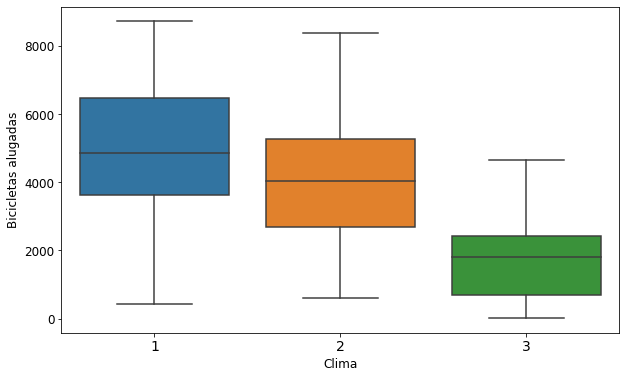

In [60]:
# CATEGÓRICA x NUMÉRICA - boxplot
sns.boxplot(data=dados, y='bicicletas_alugadas', x='clima')
plt.xlabel('Clima')
plt.ylabel('Bicicletas alugadas')

plt.xticks(fontsize=14)
plt.show()

## <font color=orange><b>Normalização</b></font>

In [61]:
y = dados['bicicletas_alugadas'].values
X = dados[['clima', 'temperatura']].values  # -> np.array

In [62]:
# Normalização: Máx - Mín [0 - 1]
X_maxs = np.amax(X, axis=0)
X_norm = X / X_maxs
print(X_norm)

[[0.66666667 0.43242565]
 [0.66666667 0.42066914]
 [0.33333333 0.22524188]
 ...
 [0.66666667 0.28826395]
 [0.33333333 0.27553942]
 [0.66666667 0.26577246]]


In [63]:
# Normalização: Máx - Mín [0 - 1]
ymax = np.amax(y)
y_norm = y / ymax


# <font color=orange><b>Estrutura das Redes Neurais</b></font>

## **FUNÇÕES DAS REDES**

* Cada valor das variáveis explicativas é multiplicado pelo PESO. 
* Depois são somados os produtos de todas variáveis obtendo um valor da SOMA em cada registro.
* Após isso, os valores da SOMA são processados pela FUNÇÃO DE ATIVAÇÃO, obtendo o valor da saída.

![Sigmoid](https://lh4.googleusercontent.com/efWc9RBhWUYYoYuqXhcQdjseIJ_r1_esW1muTDlcn73SJWjl9IUTX88SzYN3JKVdadXhJaBj6a_NAG-zPPwb_rWrJfdtiDz9AyPqAKkHLjK8mHOVnSwsv6iiYRHftydAF4YgCQvqTgoUg4wGQoqI_kTUOC1WLGd5lOl7VWrcOnyS66IsfKKWT3Ks7A)

In [64]:
def sigmoid(Soma):
    return 1 / (1 + np.exp(-Soma))

def relu(Soma):
    return np.maximum(0, Soma)

## <font color=orange>ARQUITETURA</font>

São contados como camadas a OCULTA e a SAÍDA.

![](https://lh3.googleusercontent.com/E5770rjjn5MwDYlF223vH9BFHUabRqgjBVD5_w803-b4AYBFt3otScCwEwXSs3TiZqUOzPnKVelJc80w7XUVlG1gb5itYvkJarJKRohHkFw_MaftLCEXr76Hvu04cXLt0qPcNj-NDNI4oWXS5C26PDayis-xfLwuULdotA9QBMR7NnFWRMcrEGKC6Q)

![](https://lh5.googleusercontent.com/5zo-cEpO2Hg04Ee_AqvRavZj1uCm72snjWQOZ0SkTK64v6ytHwHgbtmQ9bMyTRJOQBaXzca-myvyY2IhWBSQTcuoMHWR31ZnfYHAGUO94KBSZmufH8szs8TE0EXatC-i91uX1qoF5c4g56D_UUgyQaQaB6AqelTJERSnUvqdALjiRng6PAPBr6rf9g)

**PROPAGAÇÃO**

Uma rede neural é um conjunto de funções entre os dados de entradas, um conjuntos de *nodes* e uma saída esperada.

In [65]:
nodes = 50

arquitetura = [
    # ENTRADA=2 variáveis; SAÍDA: número de nodes, ATIVAÇÃO
    {'dim_entrada': 2, 'dim_saida': nodes, 'ativacao': 'relu'},
    # ENTRADA=3 nodes; SAÍDA: resposta esperada, ATIVAÇÃO
    {'dim_entrada': nodes, 'dim_saida': 1, 'ativacao': 'sigmoide'},
]

## <font color=orange>PESOS e VIESES</font>

Os pesos serão armazenados em matrizes.

![](https://lh3.googleusercontent.com/i1t1_Ae_bpjVc4Pnls2tgNE3tuW3IM5H2Up0oEaKWd-nTxSvmCMb1mb-mCIYAGtUFoGrJW_LHuQtqe3E2N-8eZuiCY3wJGbGbi5WCpbxP1UDSkPABxLah6dtt7_Ec6XlIMa0VMdGbhKXJ8lKUaMuXAEDWji5psX5RO4YJIE3U0EMV7cITehhT-JlEw)

![](https://lh4.googleusercontent.com/mFX3DR1ARHT8Sq70x7RLCyc-CJfpe7goRzXWyFO58jRHRsXwnikeMDq2Qi-1sqwEruMwtXG0ObO_v79UFPm7uw8mahGZx6vu_byEWKNeK_RswvNXLP4PZjNxmEh6HvS_nDDBeLnrhDjv3fUfGn-xg0E8gyr7ZBKPVNzpu8EXsB6udsskQvmUqQPK_w)

In [66]:
def inicia_camadas(arquitetura, seed=99):
    # inicia os valores aleatórios
    np.random.seed(seed)

    # A quantidde de camadas é o comprimento da arquitetura
    numero_de_camadas = len(arquitetura)

    # inicia armazenamento de parametros
    valores_parametros = {}
    # itera nas camadas da rede
    for indice, camada in enumerate(arquitetura):
        indice_camada = indice + 1

        # extrai o numero de nodos nas camadas
        tamanho_camada_entrada = camada['dim_entrada']
        tamanho_camada_saida = camada['dim_saida']

        # inicia os valores na matriz de pesos P e o vetor de viés ou bias b
        # PESOS
        valor_randomico = np.random.randn(tamanho_camada_saida, tamanho_camada_entrada)
        valores_parametros['P' + str(indice_camada)] = valor_randomico

        # VIESES
        valor_randomico = np.random.randn(tamanho_camada_saida,1)
        valores_parametros['B' + str(indice_camada)] = valor_randomico

    return valores_parametros

In [67]:
inicia_camadas(arquitetura)

{'P1': array([[-0.14235884,  2.05722174],
        [ 0.28326194,  1.32981198],
        [-0.15462185, -0.06903086],
        [ 0.75518049,  0.82564665],
        [-0.11306921, -2.36783759],
        [-0.16704943,  0.68539797],
        [ 0.02350011,  0.45620128],
        [ 0.27049278, -1.43500814],
        [ 0.88281715, -0.58008166],
        [-0.5015653 ,  0.59095329],
        [-0.73161625,  0.26175546],
        [-0.85579558, -0.18752591],
        [-0.37348629, -0.46197097],
        [-0.8164661 , -0.0451233 ],
        [ 0.12132778,  0.92595278],
        [-0.5738197 ,  0.05270311],
        [ 2.20731059,  0.39182187],
        [ 0.48271343,  0.43333402],
        [-1.70429169, -0.24390807],
        [-2.13970379,  0.86132265],
        [ 1.7002844 , -0.5287848 ],
        [ 1.76347792, -1.12160783],
        [-1.19193417,  0.55273192],
        [-0.81598095, -0.49664685],
        [ 1.08622556, -0.97467528],
        [-0.28213582, -0.11721415],
        [ 0.37854727,  0.73219465],
        [-0.10357103, 

## **PROPAGAÇÃO DA REDE**


In [90]:
# A forma mais eficiente computacionalmente é através do cálculo de matrizes.
def propaga_uma_camada(Ativado_anterior, Pesos_atual, b_atual, ativacao='relu'):
    # cálculo da entrada para a função de ativação
    Saida_atual = np.dot(Pesos_atual, Ativado_anterior) + b_atual
    
    # selecção da função de ativação
    if ativacao is "relu":
        func_ativacao = relu
    elif ativacao is "sigmoid":
        func_ativacao = sigmoid
    else:
        raise Exception('Ainda não implementamos essa funcao')
        
    # retorna a ativação calculada Ativado_atual e a matriz intermediária Saida
    return func_ativacao(Saida_atual), Saida_atual

In [91]:
def propaga_total(X, valores_parametros, arquitetura):
    # memoria temporaria para a retropropagacao
    memoria = {}  # para guardar os dados da rede neural

    # O vetor X é a ativação para a camada 0
    Ativado_atual = X

    # iterações para as camadas
    for indice, camada in enumerate(arquitetura):
        # a numeração das camadas começa de 1
        indice_camada = indice + 1
        # utiliza a ativação da iteração anterior
        Ativado_anterior = Ativado_atual

        # extrai a função de ativação para a camada atual
        func_ativacao_atual = camada['ativacao']
        # extrai os pesos da camada atual
        Pesos_atual = valores_parametros['P' + str(indice_camada)]
        # extrai os pesos da camada atual
        b_atual = valores_parametros['B' + str(indice_camada)]

        # cálculo da ativação para a camada atual
        Ativado_atual, Saida_atual = propaga_uma_camada(Ativado_anterior, Pesos_atual, b_atual, func_ativacao_atual)

        # salva os valores calculados na memória
        memoria['A' + str(indice)] = Ativado_anterior
        memoria['Z' + str(indice_camada)] = Saida_atual
    
    # retorna o vetor predito e um dicionário contendo os valores intermediários
    return Ativado_atual, memoria

# Avaliando o Modelo

In [92]:
# Execução da rede
valores_parametros = inicia_camadas(arquitetura, seed = 99)
y_estimado, memoria = propaga_total(np.transpose(X), valores_parametros, arquitetura)

Exception: ignored

In [86]:
# Comparação da previsão
print(f'y real é {y_norm[0]* ymax:.2f}')
print(f'y estimado foi de {y_estimado[0,0] * ymax:.2f}')

y real é 985.00
y estimado foi de 5.18


## Custo - Entropia binária cruzada

Para avaliar o quanto nós erramos, de forma a ter uma medida de avaliação para a correção da rede, iremos adotar uma **função de custo (loss function)**. Aqui usaremos a função de entropia binária cruzada. Ela busca garantir que o nosso valor predito é o mais próximo do valor real de y.

> "A função de custo vai ser usada durante a correção dos pesos, como uma forma de medir se estamos nos aproximando da resposta desejada. Queremos diminuir a diferença entre a resposta conhecida e a estimada."

$$\hat{y} = y_{estimado}$$

$$F(\hat{y}, y) = -(y \log{\hat{y}}+ (1-y) \log{(1-\hat{y})})$$

![função de custo entropia binária cruzada](https://lh4.googleusercontent.com/N8kWLU3otpzUjLxIMYlgY0qJUIpzkQfNDvTgAZuA8dQGnMK2x-pO6hxajI4ZnysfPrt4ogNBZLkuHooEuSdLYYKAHulfDwZoo7CaU2hnYFi8tbeBmW2mjtBzZKeEihi8zyFP-AWrx9a-uqXthqEX3SpxG0Y_qPtNGiY9Y4dQwqRvHceZdUqk7cb60g)

In [72]:
def valor_de_custo(Y_predito, Y):
    # numero_de_exemplos
    m = Y_predito.shape[1]
    
    custo = -1 / m * (np.dot(Y, np.log(Y_predito).T) + np.dot(1 - Y, np.log(1 - Y_predito).T))
    return np.squeeze(custo)

## Atualização dos pesos

Curva Peso - Custo: a busca do peso ideal, o de mínimo custo global.

![Curva Peso - Custo: a busca do peso ideal, o de mínimo custo global.](https://lh4.googleusercontent.com/6lGFF5vafaoU51GOEF2EWfLC-NMZmpgOfyrhnUvfGZxotK0ZNdTBaotZ_PgOPqm5_85stJLg5OfdyAVtTaCMUss0P3qpRwVsKmdYje7YgQG6pU-5FGoEzJbLnBMN1prJVD_z7eAodqfRRjOYBWTT-JYJ5CXYfFOiLyTqFHRMvBgfBq2RqSRA8tVe3g)

> O algoritmo usado para atualizar os pesos da rede recebe o nome de gradiente descendente e é o mais usado em machine learning, embora existam algumas variações dele. A ideia de aplicação do gradiente descendente é a minimização da função de custo. Isso significa encontrar o ponto onde a função de custo possui o menor valor.

> Esse valor será mínimo quando o nosso número de bicicletas alugadas estimado for o mais próximo possível do número conhecido de número de bicicletas alugadas. 

> Através da matemática, sabemos que o ângulo de descida de uma função é a derivada da função com respeito a um determinado valor. No nosso caso queremos derivar a função de custo em relação aos pesos, ou em relação ao valor estimado que é dependente dos pesos. Queremos saber em que direção devemos atualizar os pesos para que o custo diminua.

![](https://lh3.googleusercontent.com/2JEQnsGW-ErfvQv79mqQT0z6hEZ09Pj1f-LZ6NVyD_-cqet7nzAIRZ1QrGB87vok7NED3v8VuCkkIS8ZCu6Bw5h_-J4koxT1ymjfhokWxUFJ1psqyDZimKb2TnwkVgRST4Tr2_Twb3__8UdC6CvbPMA)

> Devemos ter em mente que conforme andamos pela função o ângulo de descida muda. Por isso, o algoritmo de gradiente descendente é aplicado iterativamente. Andamos um passo na função e atualizamos os pesos. Depois disso, andamos mais um passo e verificamos se progredimos. O quanto andamos em cada passo é a taxa de aprendizagem. O tamanho da taxa de aprendizagem é importante. Se escolhemos uma taxa de aprendizagem muito alta, podemos passar direto do ponto de mínimo, sem nunca chegar neste valor. Embora a sua escolha seja muitas vezes por tentativa e erro, a taxa de aprendizagem pode ser escolhida de forma sistemática. Um valor ótimo pode ser obtido como aquele que fornece a maior diferença entre dois valores de custo consecutivos. Além disso, em alguns casos, a taxa de aprendizagem pode ser atualizada no decorrer da aplicação do algoritmo de gradiente descendente. Diminuímos o valor da taxa de aprendizagem aos poucos conforme nos aproximamos do ponto de mínimo da função de custo.

In [73]:
def atualiza(valores_parametros, gradientes, arquitetura, taxa_aprendizagem):
    for indice_camada, camada in enumerate(arquitetura, 1):
        valores_parametros['P'+str(indice_camada)] -= taxa_aprendizagem * gradientes[
            'dP'+str(indice_camada)
        ]
        valores_parametros['b'+str(indice_camada)] -= taxa_aprendizagem * gradientes[
            'db'+str(indice_camada)
        ]
        return valores_parametros

## Gradientes

Na última camada o gradiente é derivada da função de custo pelo número de y estimados.

$$Gradiente = \frac{dCusto}{d \hat{y}}$$

A derivada da função de entropia é:

$$ \frac{dF}{ d \hat{y} } = -1 \left ( \frac{y}{\hat{y} }-\frac{ (1-y) }{(1 - \hat{y} ) } \right )$$

In [74]:
def retropropagacao_total(Y_predito, Y, memoria, valores_parametros, arquitetura):
   
    gradientes = {}
    
    # numero de exemplos
    #m = Y.shape[1]
    # para garantir que os dois vetores tenham a mesma dimensão
    Y = Y.reshape(Y_predito.shape)
    
    # inicia o algoritmo de gradiente descendente
    dAtivado_anterior = - (np.divide(Y, Y_predito) - np.divide(1 - Y, 1 - Y_predito));
    
    for indice_camada_anterior, camada in reversed(list(enumerate(arquitetura))):
        
        indice_camada_atual = indice_camada_anterior + 1
        # Função de ativação para a camada atual
        
        funcao_ativao_atual = camada["ativacao"]
        
        dAtivado_atual = dAtivado_anterior
        
        Ativado_anterior = memoria["A" + str(indice_camada_anterior)]
        Saida_atual = memoria["Z" + str(indice_camada_atual)]
        
        Pesos_atual = valores_parametros["P" + str(indice_camada_atual)]
        b_atual = valores_parametros["b" + str(indice_camada_atual)]
        
        dAtivado_anterior, dPesos_atual, db_atual = retropropagacao_uma_camada(
            dAtivado_atual, Pesos_atual, b_atual, Saida_atual, Ativado_anterior, funcao_ativao_atual)
        
        gradientes["dP" + str(indice_camada_atual)] = dPesos_atual
        gradientes["db" + str(indice_camada_atual)] = db_atual
    
    return gradientes

> Agora já vimos mais ou menos como que funciona o cálculo do gradiente para a última camada, mas agora precisamos entender melhor como que vai funcionar para as demais camadas e, para isso, podemos olhar novamente para o processo de propagação.

Então, podemos lembrar que na aplicação do processo de propagação temos a aplicação de uma soma para o cálculo dos valores dos nodos que vão, se os valores dos nodos após a aplicação de uma função de ativação. Essa função de ativação vai sair dos valores dos nodos para passar para uma próxima camada.

Se ela chegar em uma próxima camada oculta, por exemplo, esses valores vão ser o x, a entrada dessa camada oculta, e eles vão entrar em uma outra função de soma de forma que posteriormente eles vão entrar ainda depois de uma outra função de ativação. Isso daí pode ser até uma função de ativação n, um “an” aqui, porque eu posso ter n camadas de ativação.

O que eu quero que você entenda é que o processo de propagação pode ser visto através de uma aplicação de uma série de funções, a composição de funções.

Se voltarmos agora para o processo de retropropagação, podemos pensar que a derivada dessas funções, o ângulo de descida, o gradiente que vamos calcular para cada uma das camadas ocultas, ele vai ser obtido através da aplicação da derivação de uma função composta.

A derivação de uma função composta é feita através da aplicação da regra da cadeia e através da aplicação da regra da cadeia conseguimos montar padrões e obter essas equações que nós vamos utilizar para o cálculo do gradiente.

Sempre tenha em mente que estamos calculando o gradiente, a derivada, a direção de descida, o ângulo de descida, da nossa montanha de função de custo. Para isso, nosso dP, a derivada, o gradiente dos pesos, vai ser obtido através dessa equação aqui.

O que que é cada termo aqui? O m é o nosso número de nodos em uma determinada camada. O Z seria o valor de soma, da aplicação de soma, e aqui seria o gradiente do dZ. E o A é o resultado da aplicação da função de ativação. O T aqui está indicando a transposta, porque vai ser uma matriz, e o l é um índice que indica se eu estou pegando o dZ da camada atual que eu estou considerando ou de uma camada anterior que está funcionando como a entrada para essa camada que eu estou levando em consideração.

Para economizar espaço eu vou implementar já a derivada, a nossa relu_retro e a sigmoid_retro não vai me retornar o g' ele vai me retornar dA multiplicado pelo g' direto, que vai ser o dZ.

![Retropropagação](https://lh4.googleusercontent.com/9ESQciGJRjYqLpvXyHZ5DmltCSQeVX8_lR7XA721LmjmaJxsGZhS6Swu1nD5p60ntB9enjmLTuFqFcogFaqWB0Gcrh082Yig-4VODpWD0ZYD1LI86UfmOgQqZ4bbrBsbhh756_lmb3cvaodbi33qbrYh-Tzc-H6M9rMStya8v_wKaoQ9IRTA3O5BZw)

In [75]:
def sigmoid_retro(dAtivado, Saida):
    sig = sigmoid(Saida)
    return dAtivado * sig * (1 - sig)

def relu_retro(dAtivado, Saida):
    dSaida = np.array(dAtivado, copy = True)
    dSaida[Saida <= 0] = 0;
    return dSaida;

In [76]:
def retropropagacao_uma_camada(dAtivado_atual, Pesos_atual, b_atual, Saida_atual, Ativado_anterior, ativacao="relu"):
    # número de exemplos
    m = Ativado_anterior.shape[1]
    
    # seleção função de ativação
    if ativacao is "relu":
        func_ativacao_retro = relu_retro
    elif ativacao is "sigmoid":
        func_ativacao_retro = sigmoid_retro
    else:
        raise Exception('Ainda não implementamos essa funcao')
    
    # derivada da função de ativação
    dSaida_atual = func_ativacao_retro(dAtivado_atual, Saida_atual)
    
    # derivada da matriz de Pesos
    dPesos_atual = np.dot(dSaida_atual, Ativado_anterior.T) / m
    # derivada do vetor b
    db_atual = np.sum(dSaida_atual, axis=1, keepdims=True) / m
    # derivada da matriz A_anterior
    dAtivado_anterior = np.dot(Pesos_atual.T, dSaida_atual)

    return dAtivado_anterior, dPesos_atual, db_atual

É comum haver confusão entre o algoritmo do gradiente descendente e o de retropropagação. O gradiente descendente é utilizado para a atualização dos pesos, e a retropropagação é utilizada para obter o gradiente que é utilizado dentro do algoritmo de gradiente descendente.

Um tensor é uma generalização de vetores e matrizes para dimensões maiores do que 1D ou 2D

# Modelo de Treino

Cada atualização dos pesos, retropropagação é chamada de **época**.

Taxa de aprendizagem é o quanto que será atualizado os pesos.

In [80]:
def treino(X, Y, X_teste,Y_teste, arquitetura, epocas, taxa_aprendizagem):
    # Inicia os parâmetros (pesos) da rede neural
    seed=2
    valores_parametros = inicia_camadas(arquitetura, seed)

    historia_custo = []
    historia_custo_teste = []

    for i in range(epocas):
        # Obtém-se um Y, mas ainda não muito bom
        Y_predito, memoria = propaga_total(X, valores_parametros, arquitetura)

        Y_predito_teste, memoria_teste = propaga_total(X_teste, valores_parametros, arquitetura)

        # Quanto foi o erro?
        # calcula as métricas e salva nas listas de história
        custo = valor_de_custo(Y_predito, Y)
        custo_teste = valor_de_custo(Y_predito_teste, Y)
        historia_custo.append(custo)
        historia_custo_teste.append(custo_teste)

        # Correção dos valores de pesos
        gradientes = retropropagacao_total(Y_predito, Y, memoria, valores_parametros, arquitetura)
        # atualição dos pesos
        valores_parametros = atualiza(valores_parametros, gradientes, arquitetura, taxa_aprendizagem)

        if(i % 50 == 0):
            print("Iteração: {:05} - custo: {:.5f} ".format(i, custo))

    return valores_parametros, historia_custo, historia_custo_teste

# Implementação

## Treino

In [78]:
from sklearn.model_selection import train_test_split

In [82]:
X_treino, X_teste, y_treino, y_teste = train_test_split( X, y, test_size=0.43, random_state=42)

# Treinamento
# treino(X, Y, X_teste, Y_teste, arquitetura, epocas, taxa_aprendizagem)
# -> valores_parametros, historia_custo, historia_custo_teste
valores_parametros, historia_custo, historia_custo_teste = treino(
    np.transpose(X_treino), np.transpose(y_treino.reshape((y_treino.shape[0], 1))), 
    np.transpose(X_teste), 
    np.transpose(y_teste.reshape((y_teste.shape[0], 1))), 
    arquitetura, 20000, 0.01)

ValueError: ignored

In [ ]:
# Visualização do desempenho
plt.plot(historia_custo)
plt.plot(historia_custo_teste, 'r')
plt.legend(['Treinamento','Teste'])
plt.ylabel('Custo')
plt.xlabel('Épocas')
plt.show()

## Previsões

In [ ]:
# Previsão
Y_pred, _ = propaga_total(np.transpose(X_teste), valores_parametros, arquitetura)

In [ ]:
plt.plot(np.transpose(X_teste)[1],ymax*y_teste,'.')
plt.plot(np.transpose(X_teste)[1],ymax*Y_pred.reshape([-1,1]),'.r')
plt.legend(['Reais','Preditos'])
plt.ylabel('bicicletas_alugadas')
plt.xlabel('temperatura')
plt.show()

In [ ]:
plt.plot(3*np.transpose(X_teste)[0],ymax*y_teste,'.')
plt.plot(3*np.transpose(X_teste)[0],ymax*Y_pred.reshape([-1,1]),'.r')
plt.legend(['Reais','Preditos'])
plt.ylabel('bicicletas_alugadas')
plt.xlabel('clima')
plt.rcParams.update({'font.size': 22})
indice=[1,2,3]
plt.xticks(indice, fontsize=14)
plt.show()